
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Description of columns:

1-id-- rows unique id

2-imdb_id-- imdb unique id

3-popularity-- popularity score

4-budget-- budget of movie

5-revenue-- revnue of movie

6-original_title-- title of movie

7-cast-- cast in movie

8-homepage-- linke of the movie website

9-director-- the name of the movie director

10-tagline-- tagline of movie

11-keywords-- keywords of movie

12-overview-- overview of movie

13-runtime-- the duration of movie

14-genres-- type of movie

15-production_companies-- name of the movie production company

16-release_date-- release data of movie

17-vote_count-- vote cast by viewers

18-vote_average-- avarage of vote cast by viewers

19-release_year-- release year of movie

20-budget_adj-- budget in 2010 dollars,accounting for inflation

21-revenue_adj-- revenue in 2010 dollars,accounting for inflation


### Question(s) for Analysis

>Does a high-budget movie generate high revenue ?

>Does a high-budget movie has more popularity?

>Which genre has produced the most films?

>What are the top movies based on their average vote?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [3]:
#read the dataset 
df = pd.read_csv('tmdb-movies.csv')
#printing the first five rows of dataset 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#size of the dataset
df.shape

(10866, 21)

the tmdb dataset contains 10866 rows and 21 columns.


In [5]:
# to show data type and null values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies these columns have null value   

In [6]:
# getting basic descriptive statistics rof each columns.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some rows has min value equal 0 mean there are some missing values. The budget, revenue and runtime for some movie equal 0. I decided to drop all the rows which equal 0.


### Data Cleaning
> I will going to clean the dataset to make it easy and fit for analysing.

In [7]:
# Removing unnecerssary data
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'director', 'production_companies' ], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#check the size of data.
df.shape

(10866, 12)

In [9]:
#check duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [10]:
# Check for duplicates in the data
sum(df.duplicated())

1

there is 1 duplicate

In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

Now there is no deplicates

In [12]:
#view missing value count for each feature
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
# drop rows with any null values in dataset
df.dropna(inplace=True)

In [14]:
# convert release_date clumn datatype from int to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
#confirm correction
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


Now there is no null value

In [16]:
# Replace all values of 0 with NAN
df = df.replace(0, np.nan)

In [17]:
# Removing all the row which has NAN value
df = df.dropna()

In [18]:
#size of data
df.shape

(3854, 12)

After cleaning the data has 3854 rows and 12 cloumns 

<a id='eda'></a>
## Exploratory Data Analysis

 I am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section. 

### General look

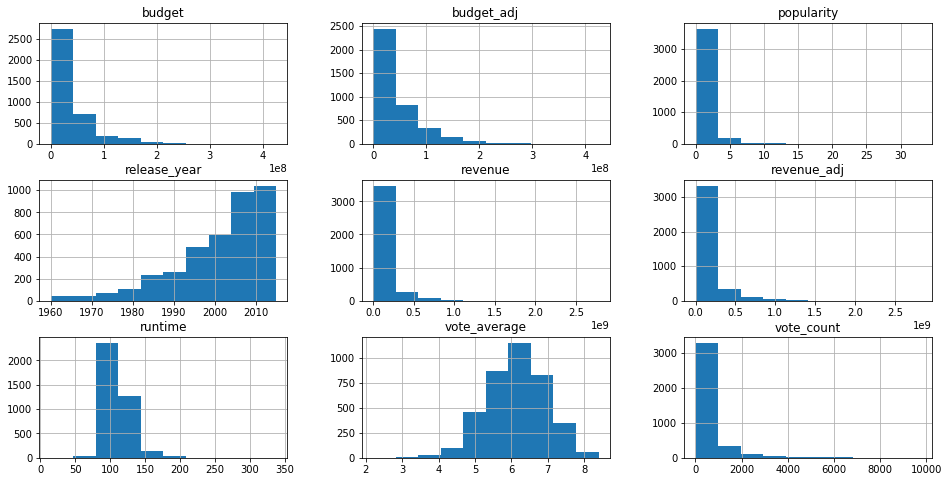

In [19]:
# upload hist graph for all columns
df.hist(figsize=(16,8));

all of them have a right-skewed distribution except the release year has left-skewed distribution and the vote average has a normal distribution

### Research Question 1 
#### Does a high-budget movie generate high revenue ?


I will visualize the budget and revenue columns by scatter plot to make conclution.

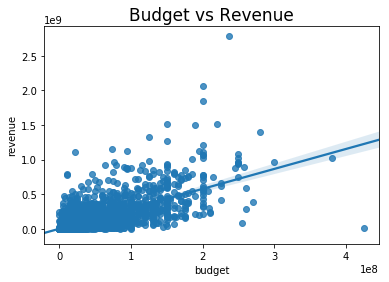

In [20]:
# plot scatter plot for two cloumns
sns.regplot(x=df['budget'], y=df['revenue']).set_title('Budget vs Revenue',size = 17);

from the scatter plot I can conclude that there is positive correlation between budget and revenue 

### Research Question 2
#### Does a high-budget  movie has more popularity?

I will visualize two columns by scatter plot for the budget and popularity to make conclusion

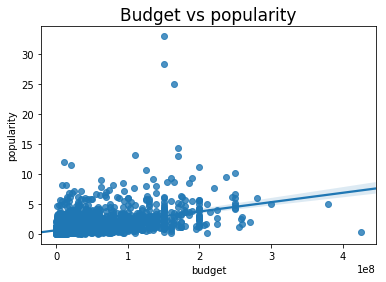

In [21]:
#Plot scatter plot for two columns 
sns.regplot(x= df['budget'], y = df['popularity']).set_title("Budget vs popularity", size= 17);

From the scatter plot there is positive correlation between budget and popularity.

### Research Question 3
#### Which genre has produced the most films?


First will seorate the genres coulmns and count the number of movie for each genre

In [22]:
# separate the data in genres column and count the number of movie for each genre
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    count_data = split_data.value_counts(ascending=False)
    return count_data

Now will show the result in pie chart to get the conclusion

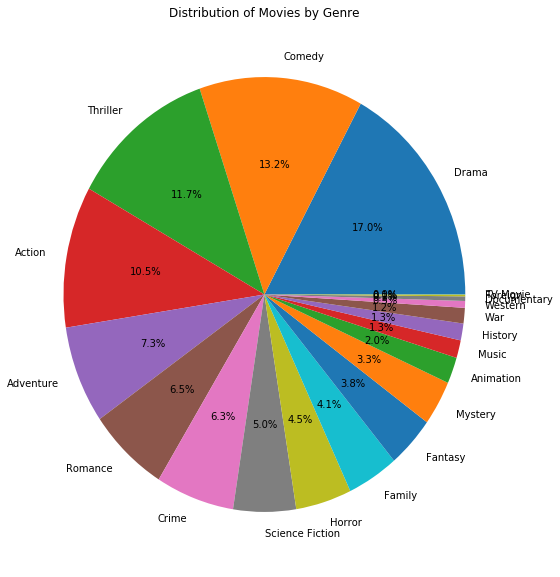

In [23]:
# plot pie to show count the number of movie for each genre
separate_count('genres').plot(kind="pie", figsize=(9,10), autopct="%1.1f%%")

# Set the title of the pie
plt.title("Distribution of Movies by Genre")

#Set the y-axis label
plt.ylabel('')

# Display the plot
plt.show()

From the pie chart the Drama has the highest numbee of movie by 17% the next is comdey by 13.2% and the last one is TV Movie. 

### Research Question 4
####  What are the top movies based on their average vote?

In [24]:
# created DataFrame contins the top 10 movies based on their vote average.
voters = df.nlargest(10, 'vote_average')
voters_top10 = voters[['original_title', 'vote_average']].head(10)  
voters_top10

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1
2875,The Dark Knight,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1
10222,Schindler's List,8.1


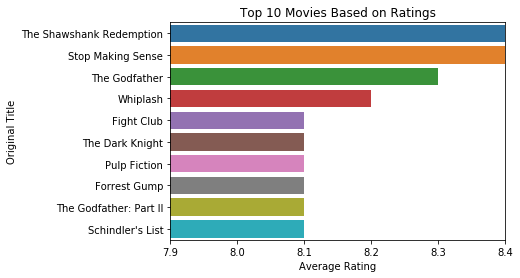

In [25]:
# plot the top 10 movies in bar chart to visualize the result
sns.barplot(x='vote_average', y='original_title', data = voters_top10);

# Set the x-axis limits
plt.xlim(7.9, 8.4)

# Set the y-axis label
plt.ylabel('Original Title')

# Set the x-axis label
plt.xlabel('Average Rating')

# Set the title of the plot
plt.title('Top 10 Movies Based on Ratings')

# Display the plot
plt.show()

The top 1 movie based on vote average is The Shawshank Redemption.  	 


# <a id='conclusions'></a>
## Conclusions
After analysing the questions I got these findings: There are positive correlations between budget and popularity and revenue, so most high budget movie most profitable and popularity movie. 
Also, there are 20 types of movie genres. Most of the movies were Drama by17% then Comdey by 13.1% while the last is TV Movie. Finally, the top 10 movies based on the vote average in order are The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash, Fight Club, The Dark Knight, Pulp Fiction, The Dark Knight, Pulp Fiction, Forrest Gump, The Godfather: Part II, Schindler's List. The top 1 movie based on vote average is The Shawshank Redemption.  	 



## Limitations
● The budget, revenue and runtime of some movies had equal to zero led me to delete a lot of rows. 

● Duplicates in the data affect the result.


In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0